In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_raw = pd.read_csv(
    "housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [3]:
ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin")
)
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2020-06-22,Sacramento,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
2018-09-03,Nevada,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
2017-06-05,Stanislaus,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
2020-01-20,Tehama,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
2017-11-13,Stanislaus,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [4]:
sales_totals = (
    ca_housing
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
    .groupby("region_name")
    .agg({"total_homes_sold":"sum"})
)

sales_totals.head()

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


In [5]:
sales_totals["total_homes_sold"]

region_name
Los Angeles      4622703
San Diego        2373289
San Francisco     371776
Name: total_homes_sold, dtype: Int32

Text(0.5, 1.0, 'Share of Home Sales Select CA Markets')

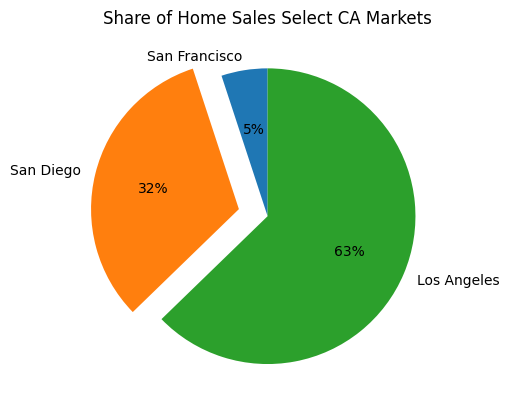

In [16]:
fig, ax = plt.subplots()

ax.pie(x=sales_totals["total_homes_sold"][::-1],
       startangle=90,
       labels=["San Francisco", "San Diego", "Los Angeles",], 
       autopct="%.0f%%",
       explode=(0, .2, 0)
      )


ax.set_title("Share of Home Sales Select CA Markets")

Text(0.5, 1.0, 'Share of Home Sales Select CA Markets')

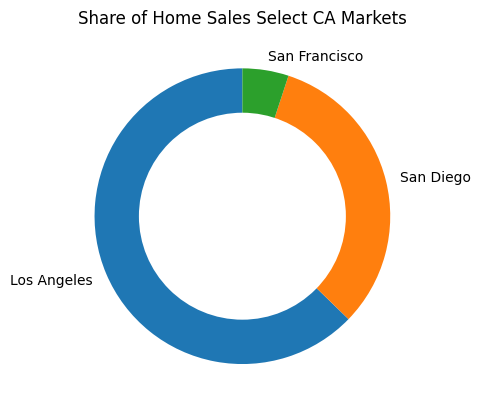

In [17]:
fig, ax = plt.subplots()

ax.pie(x=sales_totals.iloc[:, 0],
       startangle=90,
       labels=["Los Angeles", "San Diego", "San Francisco"],# autopct="%.0f%%",
       explode=(0, 0, 0),
       pctdistance=.85)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

ax.set_title("Share of Home Sales Select CA Markets")

Text(0.5, 1.0, 'Brazil % of Goal 2018')

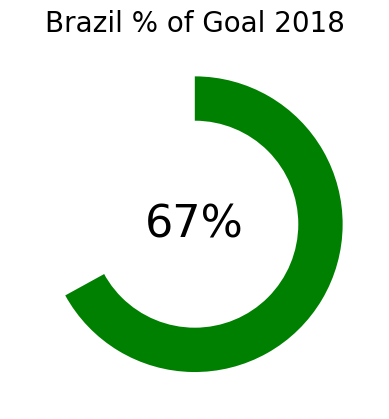

In [18]:
fig, ax = plt.subplots()

ax.pie(
    [.33, .67],
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["white", "green"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    "67%", 
    ha='center', 
    va='center', 
    fontsize=32
)
  

ax.set_title("Brazil % of Goal 2018", fontsize=20)